<a href="https://colab.research.google.com/github/arthurzhao234/CSE30/blob/main/CSE30_Discussion_Sessions_Week_8_9__Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 8-9 Discussion Sessions. Abstract Data Types: Stacks, Queues, Trees, and Graphs





## Exercises



### **1. Stack**

Use the `Stack` class to implement a palindrome checker.

In [1]:
#@title Implementing a Stack
import copy

class Stack:
    '''Implementation of a stack.'''

    def __init__(self):
        '''Initialization of a stack.'''
        self.__items = []

    @property
    def items(self):
        '''Returns the stack property items.'''
        return self.__items

    def __repr__(self):
        '''Returns a representation of the stack.'''
        return repr(self.__items)

    def isempty(self):
        '''Returns True if the stack is empty. Otherwise, returns False.'''
        return self.__items == []

    def push(self, item):
        '''Adds an item to the top of the stack.'''
        self.__items.append(item)

    def pop(self):
        '''Removes an item from the top of the stack. If there is no item, returns None.'''
        if len(self.__items) == 0:
            return None
        return self.__items.pop()

    def peek(self):
        '''Returns an item at the top of the stack without removing it from the stack.'''
        if len(self.__items) == 0:
            return None
        return self.__items[len(self.items)-1]

    def size(self):
        '''Returns the number of items in the stack.'''
        return len(self.__items)

    def copy(self):
        '''Returns a deep copy of the stack.'''
        return copy.deepcopy(self)

In [19]:
''' Your code goes here '''

def is_palindrome(word):
    stack = Stack()

    # fill the stack
    q = Stack()
    p = Stack()
    for char in word:
        q.push(char)
    while q.size()>1:
      first=q.pop()
      for i in range(q.size()-1):
        p.push(q.pop())
      last=q.pop()
      for i in range(p.size()):
        q.push(p.pop())
      if first!=last:
        return False
    return True
    '''write your code here'''

    # create the reversed word

    '''write your code here'''



In [20]:
'''Check your code here'''

print(is_palindrome("madam"))   # True
print(is_palindrome("radar"))   # True
print(is_palindrome("hello"))   # False

True
True
False


### **2. Queue**

**Round Robin (RR)** is a simple scheduling algorithm used in operating systems. It is called ***round robin*** because the CPU cycles through all processes in the queue one by one, like players taking turns in a game.

Let's look how it works:

* Processes are added to the queue in the order they arrive.
* The first process in the queue is removed and runs for a fixed time quantum.
    * If the process finishes within the time quantum, it leaves the queue.
    * If not, it is placed at the end of the queue with its remaining time.
* If all processes are complete, the scheduling procedure is terminated.

In [23]:
#@title Implementing a queue
class Queue:
    '''Implementation of a queue.'''

    def __init__(self):
        '''Initialization of a queue.'''
        self.__items = []

    @property
    def items(self):
        '''Returns property items.'''
        return self.__items

    def __repr__(self):
        return repr(self.__items)

    def isempty(self):
        '''Returns True if the queue is empty. Otherwise, returns False.'''
        return self.__items == []

    def enqueue(self, item):
        '''Adds an item to the end of the queue.'''
        self.__items.insert(0,item)

    def dequeue(self):
        '''Removes an item from the front of the queue. If the queue is empty, returns None.'''
        if len(self.__items) == 0:
            return None
        return self.__items.pop()

    def size(self):
        '''Returns the number of items in the queue.'''
        return len(self.__items)

    def copy(self):
        '''Returns a deep copy of the queue.'''
        return copy.deepcopy(self)

Complete the code below. The lists `scheduled` and `finished` keep track of processes:

* `scheduled` records every time a process is given CPU time during the run.
* `finished` records the processes that have completed execution.

In [35]:
def round_robin(processes, quantum):
    queue = Queue()
    finished = []
    scheduled = []

    # add processes to the queue
    for p in processes:
        queue.enqueue(p)
    '''write your code here'''

    # run and add processes back to the queue until all are done
    while queue.size()>0:
        current=queue.dequeue()
        print(current)
        scheduled.append(current[0])
        current=(current[0],current[1])
        if current[1]-quantum>0:
          current=(current[0],current[1]-quantum)
          queue.enqueue(current)
        elif current[1]-quantum<=0:
          finished.append(current[0])

    '''write your code here'''

    return scheduled, finished


In [36]:
processes = [('A', 11), ('B', 6), ('C', 3)]
scheduled, finished = round_robin(processes, 3)
print('Scheduled in the following order:', scheduled)
print('Finished in the following order:', finished)

('A', 11)
('B', 6)
('C', 3)
('A', 8)
('B', 3)
('A', 5)
('A', 2)
Scheduled in the following order: ['A', 'B', 'C', 'A', 'B', 'A', 'A']
Finished in the following order: ['C', 'B', 'A']


### **3. Tree**

Assume that there is a binary tree made of nodes that hold integers. You need to write a `sum_tree` function that takes one argument (a tree), traverses it, and calculates the sum of all its nodes. If the tree is empty, the function should return `None`.

In [37]:
#@title Implementing a BinaryTree class
class BinaryTree:
    def __init__(self, data=None):
        self.data = data
        self.left = None
        self.right = None

    def insertLeft(self, node):
        if self.left == None:
            self.left = node
        else:
            node.left = self.left
            self.left = node

    def insertRight(self, node):
        if self.right == None:
            self.right = node
        else:
            node.right = self.right
            self.right = node

    def __repr__(self):
        s = f'{self.data}'
        s += '('
        if self.left != None:
            s += repr(self.left)
        s += ')('
        if self.right != None:
            s += repr(self.right)
        s += ')'
        return s

In [53]:
'''Write your code here'''

def sum_tree(tree):
    if tree != None:
        queue=[tree]
    while True:
        if (queue.append(tree.left)==None)and(queue.append(tree.right)==None):
          break
        else:
          temp=0
          if tree.left!=None:
            temp+=tree.left.data
            queue.append(tree.left)
          if tree.right!=None:
            temp+=tree.right.data
            queue.append(tree.right)
          print(temp)



To check your code, first run the following code that builds a tree.

In [44]:
def build_tree(n):

    tree = BinaryTree(1)
    queue = [tree]
    count = 2

    while True:

        if count > n:
            break
        t = queue.pop(0)
        left = BinaryTree(count)
        count += 1
        t.insertLeft(left)
        queue.append(left)

        if count > n:
            break
        right = BinaryTree(count)
        count += 1
        t.insertRight(right)
        queue.append(right)

    return tree

In [54]:
'''Check your code here'''

t1 = build_tree(1)
print(t1)
assert sum_tree(t1) == 1

t2 = build_tree(2)
print(t2)
assert sum_tree(t2) == 3

t3 = build_tree(5)
print(t3)
assert sum_tree(t3) == 15

1()()


AssertionError: 

### **4. Graph**






Use the code below to write a `find_path` function that takes a graph and two nodes in the graph, and returns either a path (a list of nodes) between the two nodes or `None`.

In [ ]:
#@title Implementation of a Graph class
class Graph:
    '''Implementation of a graph.'''

    def __init__(self, *edges):
        '''Initialize the graph.'''
        self.d = {} # We create an empty dictionary.
        for v, u in edges: # We populate the dictionary with vertices and their adjacent lists.
            self.add_edge((v, u))

    def successors(self, v):
        '''Return a list of vertices to which v is adjacent to.'''
        return sorted(self.d[v])

    def add_edge(self, e):
        '''Add an edge to the graph.'''
        v, u = e
        self.add_vertex(v) # We add the first vertex v.
        self.add_vertex(u) # We add the second vertex u.
        self.d[v].add(u)   # We add u to the adjacent vertices of v.

    def add_vertex(self, v):
        '''Add a vertex to the graph.'''
        if v not in self.d: # When we add a new key to the dictionary, we set the value to an empty set.
            self.d[v] = set()

    def remove_vertex(self, v):
        '''Remove a vertex from the graph.'''
        if v in self.d:
            del self.d[v] # We remove the vertex and its adjacency list.
            for u in self.d: # We also need to remove the vertex from all adjacent lists of other vertices.
                self.remove_edge((u, v))

    def remove_edge(self, e):
        '''Remove an edge from the graph.'''
        u, v = e
        if u in self.d:
            if v in self.d[u]: # When we remove an edge, we remove the vertex u from the adjacency list of v.
                self.d[u] -= {v}

    def __repr__(self):
        '''Return a string representation of the graph.'''
        s = 'Graph:'
        for v in self.d:
            if self.d[v]:
                s += f"\n\t{v} connected to {', '.join([repr(i) for i in self.d[v]])}"
            else:
                s += f"\n\t{v} connected to None"
        return s


In [ ]:
''' Write Code Here '''

def find_path(g, start, end, path=None):

    if path is None:
        path = []

    '''write your code here'''

    return None

In [ ]:
from graphviz import Digraph

def show(g):
    dg = Digraph()
    for e in g.edges:
        dg.edge(str(e[0]), str(e[1]))
    return dg

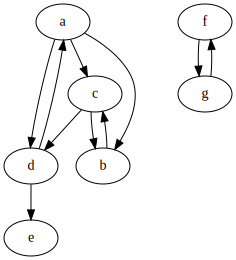

In [ ]:
g = Graph(('a', 'b'), ('a', 'd'), ('a', 'c'), ('b', 'c'),
          ('d', 'a'), ('d', 'e'), ('c', 'b'), ('c', 'd'),
          ('f', 'g'), ('g', 'f'))
g.edges = {('a', 'b'), ('a', 'd'), ('a', 'c'), ('b', 'c'),
          ('d', 'a'), ('d', 'e'), ('c', 'b'), ('c', 'd'),
          ('f', 'g'), ('g', 'f')}
show(g)


In [ ]:
path = find_path(g, 'a', 'b')
print(path) # should be ['a', 'b']

['a', 'b']


In [ ]:
path = find_path(g, 'b', 'e')
print(path) # should be ['b', 'c', 'd', 'e']

['b', 'c', 'd', 'e']


In [ ]:
path = find_path(g, 'b', 'f')
print(path) # should be None

None


### **Want more challenge?**



#### **Implement and Solve the 15 Puzzle** ####

The $15$ Puzzle is a sliding puzzle that has a $4\times4$ grid with $15$ tiles (numbered from $1$ to $15$) and one empty space. The goal is to arrange the tiles in some order by sliding tiles one at a time into the empty space.

For simplicity, we can represent a puzzle state as a $1D$ array:
```
[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 0]
```
Here, the empty space is $0$ and located at the last position (the right  bottom corner). This state corresponds to the ordered tiles from $1$ to $15$ from the left top corner to the right bottom corner:

```
[ 1  2  3  4
  5  6  7  8
  9 10 11 12
 13 14 15  0 ]
 ```

 If we exchange $15\rightarrow 0$, $11 \rightarrow 0$, and $12 \rightarrow 0$, we get:
 ```
 [ 1  2  3  4
   5  6  7  8
   9 10 12  0
  13 14 11 15 ]
  ```
We can write the array on one line:
  
```
[1 2 3 4 5 6 7 8 9 10 12 0 13 14 11 15]
```
We can calculate the number of inversions, where an inversion is a pair of elements that are out of order. For this example, the number of inversions is $7$: $13, 14, 15$ should be before $0$, and $11$ should be before $13, 14, 15,$ and $0$.

For $15$ puzzle only certain permutations are solvable:
  
  * If $0$ is located on an even row and the number of inversions is even.
  * If $0$ is located on an odd row and the number of inversions is odd.  

This is because when we exchange two numbers in the same row, the parity of inversions remains the same (parity refers to whether the number of inversions is even or odd, you can read about parity and inversion here [Parity of a permutation](https://en.wikipedia.org/wiki/Parity_of_a_permutation) and [Inversion](https://en.wikipedia.org/wiki/Inversion_(discrete_mathematics))). However, when we exchange two numbers in the same column, the parity of inversions changes.  

To solve a puzzle, we need to calculate the number of inversions and check whether the puzzle is solvable.

Next, we solve the puzzle using an **A\*** algorithm that is commonly used in graph search.

* In the $15$ puzzle, each board state corresponds to a vertex in a graph, and the edges represent legal moves (one edge corresponds to one move).
* You can imagine that in solving the puzzle, we construct this graph by explicitly generating a new board state with each move.

**A\* Algorithm:**

* We start with the scrambled board configuration. This is the first vertex in the graph.
* We generate the possible moves from the current state (sliding a tile into the empty space).
    * Depending on the position of the empty space, there are $2$, $3$, or $4$ possible moves.
    * We also do not select states that we have already visited in order to avoid looping.
* For each new state of the board, we compute $3$ values:
    * $g$: number of moves taken so far.
    * $h$: sum of Manhattan distances of all tiles from their goal positions.
    * $f$: estimated total cost $f = g + h$
* We choose the state with the lowest $f$ to explore next.
    * All discovered states are stored in a minimum-priority queue, which orders them according to their $f$ value.
* We repeat the procedure until the board matches the goal state.

For example:

```
 [ 1  2  3  4
   5  6  7  8
   9 10 12  0
  13 14 11 15 ]
```

In this case, $f(n) = f(0) = h(0) = 4$ where $n$ is a state number (arbitrary chosen). There are $3$ possible moves that generate $3$ new states, let label them $1, 2, 3$.  Let's calculate the corresponding $g$, $h$, and $f$:

**State 1**

```
 [ 1  2  3  4
   5  6  7  0
   9 10 12  8
  13 14 11 15 ]
```
**State 2**
```
 [ 1  2  3  4
   5  6  7  8
   9 10  0 12
  13 14 11 15 ]
  ```
**State 3**
```
 [ 1  2  3  4
   5  6  7  8
   9 10 12 15
  13 14 11  0 ]
```
**NOTE**

* $g$ of a node (current state) is always $1 + g$ of the parent (previous state).
* Manhattan (or taxicab) distance between two points is the sum of the absolute differences of their respective Cartesian coordinates.
* You can read about Manhattan distance here [Manhattan Distance](https://en.wikipedia.org/wiki/Taxicab_geometry).

$f(1) = g(1) + h(1) = 1 + 6 = 7$

$f(2) = g(2) + h(2) = 1 + 4 = 5$

$f(3) = g(3) + h(3) = 1 + 4 = 5$

We choose state $2$, generate next moves, and calculate $g$, $h$, and $f$:

**State 4**

```
 [ 1  2  3  4
   5  6  0  8
   9 10  7 12
  13 14 11 15 ]
```
**State 5**
```
 [ 1  2  3  4
   5  6  7  8
   9  0 10 12
  13 14 11 15 ]
  ```
**State 6**
```
 [ 1  2  3  4
   5  6  7  8
   9 10 11 12
  13 14  0 15 ]
```
$f(4) = g(4) + h(4) = 2 + 6 = 8$

$f(5) = g(5) + h(5) = 2 + 6 = 8$

$f(6) = g(6) + h(6) = 2 + 2 = 4$

We choose state $6$ and generate $2$ new moves:

**State 7**
```
 [ 1  2  3  4
   5  6  7  8
   9 10 11 12
  13 14 15  0 ]
```
**State 8**
```
 [ 1  2  3  4
   5  6  7  8
   9 10 11 12
  13  0 14 15 ]
```

We check that state $7$ matches the goal -- it is correct, so we have found the solution and stop the iteration.


Since you need to use a priority queue, run the code below.

In [ ]:
#@title Implementing a minimum priority queue
class PQueue:
    '''Implementation of a minimum priority queue.'''

    def __init__(self):
        '''Initialization of an empty priority queue.'''
        self.queue = []

    def add(self, item): # same as insert
        '''Adds an item to the priority queue.'''
        self.queue.append(item)

    def remove(self): # same as extract_min
        '''Removes an item from the priority queue.'''
        m = min(self.queue)
        self.queue.remove(m)
        return m

    def __repr__(self):
        '''Returns a representation of the priority queue.'''
        return repr(self.queue)

    def size(self):
        '''Returns a size of the priority queue.'''
        return len(self.queue)

    def isempty(self):
        '''Returns True if the deque is empty. Otherwise, returns False.'''
        return self.queue == []

Write you code below. You need to implement three functions:

* `h(state, goal)` that calculates and returns a Manhattan distance of a tile (a positive integer), where `state` is the current configuration of the board and `goal` is the correctly ordered configuration of the board.
* `new_states(state)` that finds and returns new board states by applying all possible moves.
* `a_star(start, goal)` that finds and returns a solution to the $15$ puzzle as a list of moves such as 'Right', 'Left', 'Up', and 'Down'. You need to implement an **A\*** algorithm here.

In [ ]:
''' Write Code Here '''

moves = {'Up': -4, 'Down': 4, 'Left': -1, 'Right': 1} # use this dictionary to generate the solutions of the 15 puzzle

def h(state, goal):
    ''' Returns a Manhattan distance of a tile.'''
    pass

def new_states(state):
        ''' Returns the possible new states. '''
        pass

def a_star(start, goal):
    ''' Return a solution to the 15 puzzle. '''
    pass


In [ ]:
start_state = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 15]
goal_state =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0]

solution = a_star(start_state, goal_state)
print(f'Solution steps: {solution}')
assert solution == ['Right']

Solution steps: ['Right']


In [ ]:
start_state = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 14, 15]
goal_state =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0]

solution = a_star(start_state, goal_state)
print(f'\nSolution steps: {solution}')
assert solution == ['Right', 'Right']


Solution steps: ['Right', 'Right']


In [ ]:
start_state = [5, 1, 0, 6, 3, 2, 11, 4, 9, 10, 8, 7, 13, 14, 15, 12]
goal_state =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0]

solution = a_star(start_state, goal_state)
print(f'Solution steps: {solution}')
assert solution == ['Right', 'Down', 'Down', 'Left', 'Up', 'Left', 'Left', 'Up', 'Right', 'Down', 'Right', 'Up', 'Left', 'Down', 'Right', 'Right', 'Down', 'Down']

Solution steps: ['Right', 'Down', 'Down', 'Left', 'Up', 'Left', 'Left', 'Up', 'Right', 'Down', 'Right', 'Up', 'Left', 'Down', 'Right', 'Right', 'Down', 'Down']
